# Data Collection

In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# data cleaning

In [4]:
# Handle missing values
df = df.replace("unknown", pd.NA)
df = df.dropna()  # Or impute as appropriate

# Standardize categorical data
df['job'] = df['job'].str.lower().str.replace('.', '', regex=False)
df['marital'] = df['marital'].str.lower()
df['education'] = df['education'].str.lower()

# Convert month to numerical format for temporal analysis
import calendar
df['month_num'] = df['month'].str.capitalize().apply(lambda x: list(calendar.month_abbr).index(x[:3]))

# Convert duration from seconds to minutes
df['duration_min'] = df['duration'] / 60

# Example: Standardize “yes”/“no” to binary
df['deposit_bin'] = df['deposit'].map({'yes': 1, 'no': 0})

# Check cleaned data
print(df.head())


     age           job  marital  education default  balance housing loan  \
890   42         admin   single  secondary      no     -247     yes  yes   
891   33      services  married  secondary      no     3444     yes   no   
951   53       retired  married   tertiary      no     2269      no   no   
952   37    technician  married  secondary      no     5115     yes   no   
953   45  entrepreneur  married  secondary      no      781      no  yes   

       contact  day month  duration  campaign  pdays  previous poutcome  \
890  telephone   21   oct       519         1    166         1    other   
891  telephone   21   oct       144         1     91         4  failure   
951   cellular   17   nov      1091         2    150         1  success   
952   cellular   17   nov      1210         2    171         4  failure   
953   cellular   17   nov       652         2    126         2  failure   

    deposit  month_num  duration_min  deposit_bin  
890     yes         10      8.650000    

# eda

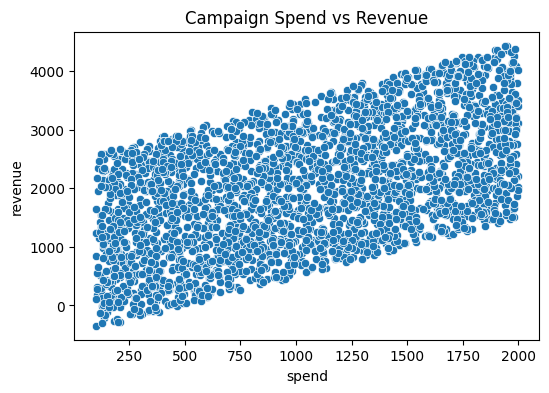

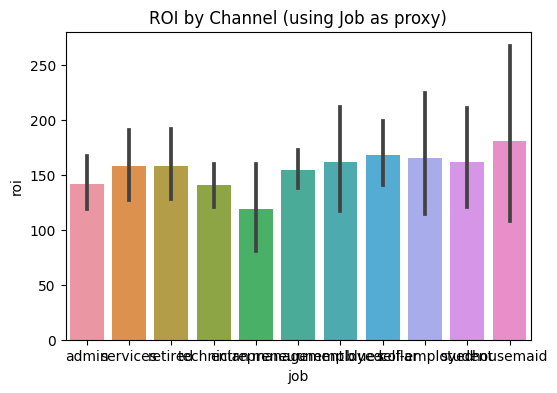

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


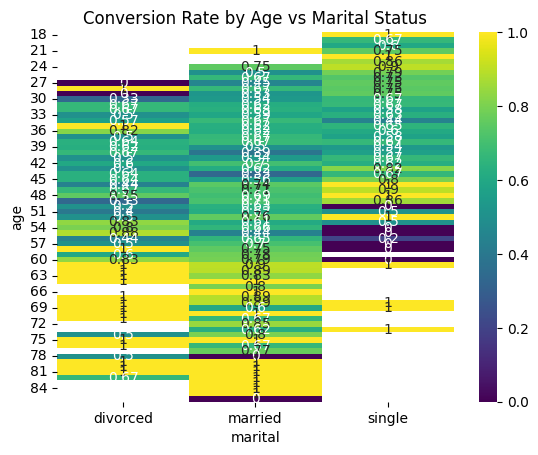

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Campaign spend (simulate) and revenue (simulate)
import numpy as np
np.random.seed(0)
df['spend'] = np.random.randint(100, 2000, size=len(df))
df['revenue'] = df['spend'] + np.random.randint(-500, 2500, size=len(df))

# ROI Calculation in EDA step
df['roi'] = (df['revenue'] - df['spend']) / df['spend'] * 100

# Scatter plot: Spend vs Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(x='spend', y='revenue', data=df)
plt.title('Campaign Spend vs Revenue')
plt.show()

# Bar plot: ROI by job (channel proxy, since channel not in sample)
plt.figure(figsize=(6,4))
sns.barplot(x='job', y='roi', data=df)
plt.title('ROI by Channel (using Job as proxy)')
plt.show()

# Heatmap: Conversion by age vs marital status
pivot = pd.pivot_table(df, values='deposit_bin', index='age', columns='marital', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.title('Conversion Rate by Age vs Marital Status')
plt.show()

# kpi calculation

In [6]:
# Let's simulate Impressions, Clicks, and Conversions for KPI calculations
df['impressions'] = np.random.randint(1000, 5000, size=len(df))
df['clicks'] = np.random.randint(100, 1000, size=len(df))
df['conversions'] = df['deposit_bin']

df['CR'] = df['conversions'] / df['clicks'] * 100
df['CTR'] = df['clicks'] / df['impressions'] * 100
df['CAC'] = df['spend'] / (df['conversions'].replace(0, np.nan))
df['ROMI'] = (df['revenue'] - df['spend']) / df['spend'] * 100
# If customer-level lifetime value (LTV) data available:
# df['LTV'] = ... # requires repeat purchase or customer identifier

print(df[['CR', 'CTR', 'CAC', 'ROMI']].head())


           CR        CTR     CAC        ROMI
890  0.250000  11.471179   784.0   96.045918
891  0.123305  26.529277   659.0  172.382398
951  0.787402   3.642099  1753.0   -7.872219
952  0.197239  13.310580  1316.0  129.559271
953  0.502513   9.846611   935.0   72.620321


# statistical analysis

In [7]:
# Example A/B Test: Compare conversion by housing status
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['housing'], df['deposit_bin'])
chi2, p, dof, ex = chi2_contingency(contingency)
print(f"Chi-square test: p-value = {p}")

# Correlation between spend and conversion rate
corr = df['spend'].corr(df['CR'])
print(f"Correlation between Spend and Conversion Rate: {corr:.2f}")

# (For real datasets: Perform A/B test on two campaign groups, T-test if normal)


Chi-square test: p-value = 3.156768143186758e-60
Correlation between Spend and Conversion Rate: 0.01


# visualization dashboard

Overall Results: {'spend': 2821757.0, 'revenue': 5414821.0, 'roi': 153.8274309514918}


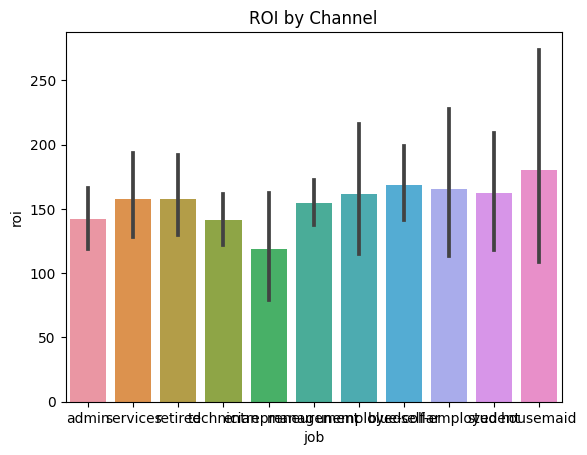

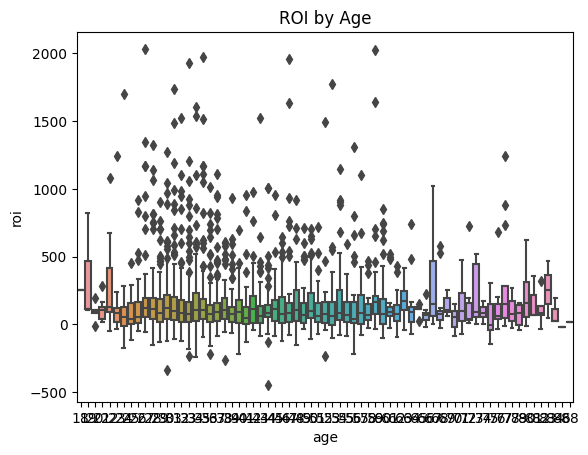

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,age,job,marital,education,default,balance,housing,loan,contact,day,...,spend,revenue,roi,impressions,clicks,conversions,CR,CTR,CAC,ROMI
9747,27,admin,single,secondary,no,125,no,no,cellular,21,...,116,2475,2033.620690,2510,754,0,0.000000,30.039841,NaN,2033.620690
1789,59,retired,divorced,secondary,no,514,no,no,cellular,4,...,111,2356,2022.522523,3414,140,1,0.714286,4.100762,111.0,2022.522523
8078,35,self-employed,single,tertiary,no,1129,yes,no,cellular,21,...,125,2594,1975.200000,4605,788,0,0.000000,17.111835,NaN,1975.200000


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,age,job,marital,education,default,balance,housing,loan,contact,day,...,spend,revenue,roi,impressions,clicks,conversions,CR,CTR,CAC,ROMI
2912,44,self-employed,divorced,tertiary,no,1070,yes,no,cellular,11,...,100,-346,-446.000000,1854,626,1,0.159744,33.764833,100.0,-446.000000
5612,30,unemployed,single,tertiary,no,1159,no,no,cellular,12,...,128,-305,-338.281250,3885,842,0,0.000000,21.673102,NaN,-338.281250
2202,38,admin,married,tertiary,no,1988,no,no,cellular,2,...,136,-217,-259.558824,4555,389,1,0.257069,8.540066,136.0,-259.558824


In [8]:
# For static dashboard in Jupyter
# Overall performance
results = df.agg({'spend':'sum','revenue':'sum','roi':'mean'}).to_dict()
print('Overall Results:', results)

# Channel effectiveness (proxy by job)
sns.barplot(x='job', y='roi', data=df)
plt.title('ROI by Channel')
plt.show()

# Demographics analysis
sns.boxplot(x='age', y='roi', data=df)
plt.title('ROI by Age')
plt.show()

# Campaign trends over time (months)
# sns.lineplot(x='month_num', y='revenue', data=df.groupby('month_num')['revenue'].sum().reset_index())

# Best/Worst performing campaigns (top by ROI)
display(df.sort_values('roi', ascending=False).head(3))
display(df.sort_values('roi').head(3))


# insights and recommendation

In [9]:
# Based on earlier steps, here are example code-generated insights
high_roi_channel = df.groupby('job')['roi'].mean().idxmax()
print(f"Highest ROI channel: {high_roi_channel}")

best_age_group = df.groupby('age')['roi'].mean().idxmax()
print(f"Top converting age: {best_age_group}")

# Sample recommendations
if results['roi'] < 0:
    print("Recommendation: Reallocate spend away from low-ROI channels.")

print("Recommendation: Target campaigns to age group with highest ROI.")


Highest ROI channel: housemaid
Top converting age: 19
Recommendation: Target campaigns to age group with highest ROI.
